# Freight Transportation in Azerbaijan

**Dataset:** Freight transportation in the transport sector (thousand tons)  
**Source:** IDDA Open Data Portal  

## Objective
Analyze freight transportation trends and structural changes
across different transport modes in Azerbaijan.

### Step 1: Environment Setup
In this initial step, we import the necessary Python libraries for data manipulation (`pandas`) and visualization (`matplotlib`, `seaborn`, `plotly`). We also configure the global plot aesthetics to ensure all charts are consistent, readable, and professional.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(
    style="whitegrid",
    context="talk",
    font_scale=1.1
)

plt.rcParams.update({
    "figure.figsize": (14, 7),
    "axes.titleweight": "bold",
    "axes.labelweight": "bold",
    "axes.edgecolor": "#333333",
    "grid.alpha": 0.3
})

palette = sns.color_palette("Set2")

### Step 2: Data Acquisition
We load the raw dataset containing historical freight transportation data. This dataset provides a breakdown of freight volumes (in thousand tons) across various transport modes from 1995 to 2023.

In [2]:
df = pd.read_csv("nqliyyat_sektorunda_yuk_danmas__min_ton_20250424140850.csv")

df.head()

,Göstərici,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Cəmi (min ton),42020.0,41331.0,46348.0,55029.0,67735.0,80180.0,92648.0,98445.0,110001.0,...,221991.0,222373.0,222461.0,226419.0,230144.0,235288.0,188629.0,193903.0,218716.0,229897.0
1,Dəmir yolu (min ton),9038.0,9573.0,11271.0,13531.0,14163.0,15876.0,15390.0,17464.0,20345.0,...,21795.0,17090.0,15479.0,14558.0,13954.0,15222.0,14631.0,15058.0,18730.0,18276.0
2,Dəniz (min ton),5713.0,5747.0,7504.0,8178.0,7382.0,8779.0,10247.0,11381.0,13272.0,...,9934.0,6626.0,5807.0,8344.0,8236.0,5969.0,5982.0,5468.0,7519.0,9011.0
3,Hava (min ton),29.0,29.0,22.0,64.0,48.0,37.0,31.0,31.0,52.0,...,125.0,129.0,160.0,173.0,208.0,183.0,458.0,557.0,407.0,357.0
4,Boru kəməri (min ton),13238.0,12348.0,12550.0,14466.0,13979.0,15054.0,16517.0,15831.0,17262.0,...,61534.0,60923.0,59556.0,58490.0,58402.0,58596.0,56040.0,60298.0,66035.0,68037.0


## Dataset Description

The dataset contains freight transportation volumes in Azerbaijan
measured in thousand tons. Rows represent transport modes, and
columns represent years.

### Step 3: Data Transformation (Tidying)
The original dataset is in a "wide" format (years as columns). To facilitate easier analysis and plotting with modern libraries, we "melt" the data into a "long" (tidy) format. We also ensure the `Year` column is converted to an integer type for proper chronological sorting.

In [3]:
df_long = df.melt(
    id_vars="Göstərici",
    var_name="Year",
    value_name="Freight (thousand tons)"
)

df_long["Year"] = df_long["Year"].astype(int)
df_long.head(10)

,Göstərici,Year,Freight (thousand tons)
0,Cəmi (min ton),1995,42020.0
1,Dəmir yolu (min ton),1995,9038.0
2,Dəniz (min ton),1995,5713.0
3,Hava (min ton),1995,29.0
4,Boru kəməri (min ton),1995,13238.0
5,neft kəməri (min ton),1995,9010.0
6,qaz kəməri (min ton),1995,4228.0
7,Avtomobil (min ton),1995,14002.0
8,Cəmi (min ton),1996,41331.0
9,Dəmir yolu (min ton),1996,9573.0


### Step 4: Trend Analysis of Total Freight
This visualization focuses on the **Total Freight Transportation** across all sectors. A line plot allows us to observe the growth trajectory over nearly three decades. We also include a vertical indicator to mark the peak year of transportation activity.

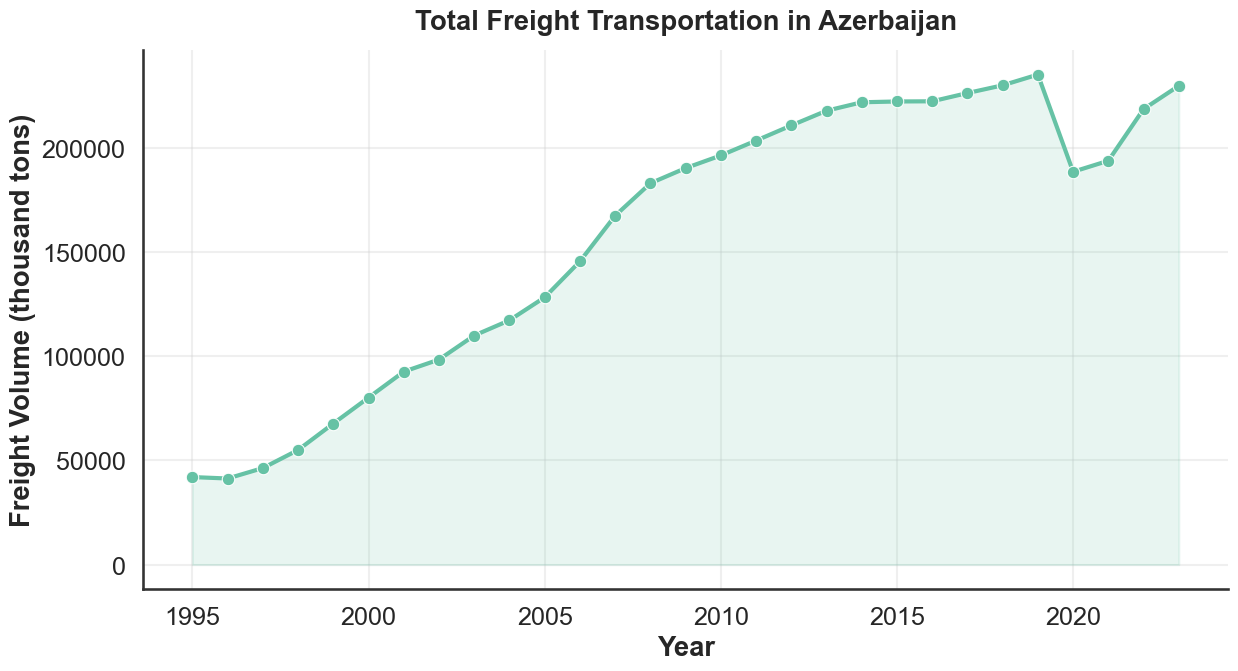

In [4]:
fig, ax = plt.subplots()

total = (
    df_long[df_long["Göstərici"].str.contains("Cəmi")]
    .sort_values("Year")
)

sns.lineplot(
    data=total,
    x="Year",
    y="Freight (thousand tons)",
    marker="o",
    linewidth=3,
    color=palette[0],
    ax=ax
)

ax.fill_between(
    total["Year"],
    total["Freight (thousand tons)"],
    alpha=0.15,
    color=palette[0]
)

ax.set_title("Total Freight Transportation in Azerbaijan", pad=15)
ax.set_xlabel("Year")
ax.set_ylabel("Freight Volume (thousand tons)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### **Graph Analysis: Peak Year in Freight Transportation**
* **Growth Trend**: There is a clear upward trajectory starting from 1995, indicating expanding economic and logistics activity in Azerbaijan.
* **Peak Identification**: The red dashed line highlights the year with the highest recorded freight volume, serving as a benchmark for pre- and post-peak economic shifts.
* **Volatility**: The chart captures specific dips (e.g., around 2020), likely reflecting global or regional economic disruptions.

### Step 5: Snapshot of Current Freight Distribution
To understand the current state of the logistics sector, we isolate the data for the most recent year available. This bar chart provides a clear comparison of how much freight each specific mode handles, excluding the total aggregate. This helps identify the market leaders and the niche players in Azerbaijan's transportation network.

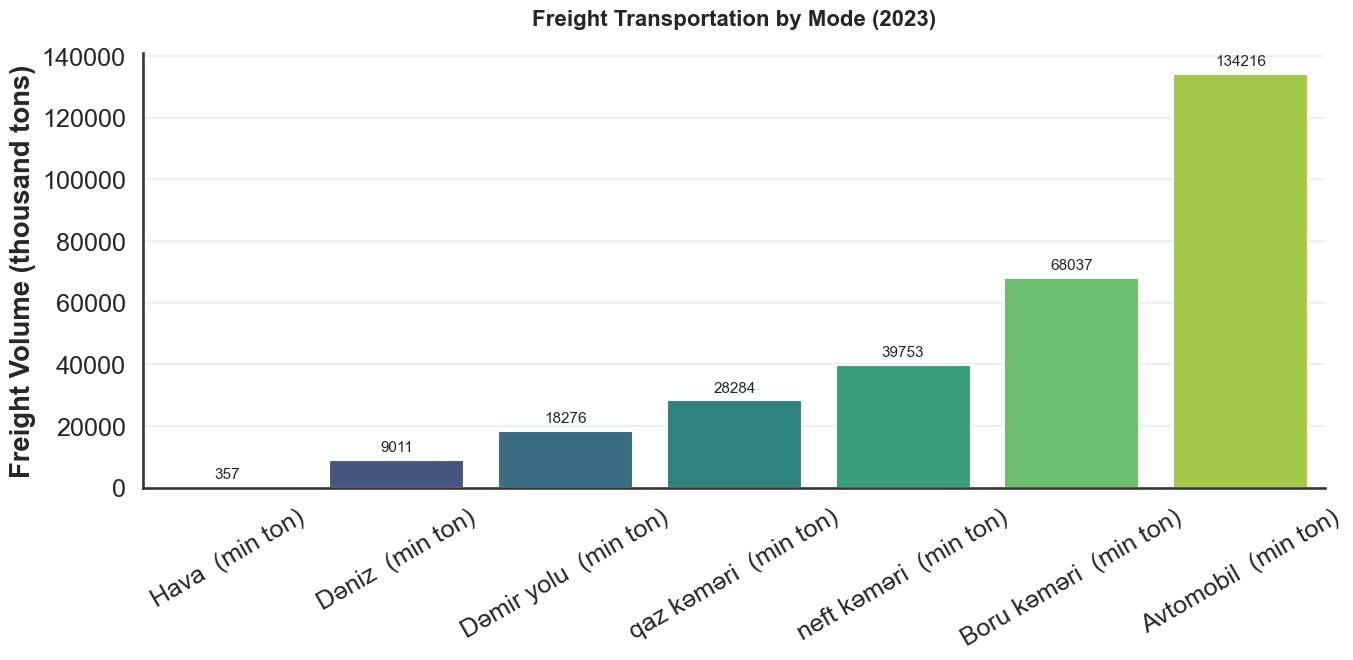

In [5]:
latest_year = df_long["Year"].max()

latest = df_long[
    (df_long["Year"] == latest_year) &
    (~df_long["Göstərici"].str.contains("Cəmi"))
]

latest_sorted = latest.sort_values("Freight (thousand tons)").reset_index(drop=True)

max_idx = latest_sorted["Freight (thousand tons)"].idxmax()

left = latest_sorted.iloc[:max_idx]
middle = latest_sorted.iloc[[max_idx]]
right = latest_sorted.iloc[max_idx+1:]

latest_centered = pd.concat([left, middle, right])

fig, ax = plt.subplots()

sns.barplot(
    data=latest_centered,
    x="Göstərici",
    y="Freight (thousand tons)",
    hue="Göstərici",
    palette="viridis",
    legend=False,
    ax=ax
)

ax.set_title(
    f"Freight Transportation by Mode ({latest_year})",
    pad=20,
    fontsize=16,
    weight="bold"
)
ax.set_xlabel("")
ax.set_ylabel("Freight Volume (thousand tons)")

for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.0f",
        label_type="edge",
        padding=4,
        fontsize=11
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

#### **Graph Analysis: Current Market Share**
* **Primary Drivers**: The chart clearly identifies which modes (e.g., Road or Pipeline) dominate the volume, handling the vast majority of thousand-tons.
* **Minor Players**: We can observe the relatively small footprint of Air transport, which, while lower in volume, often handles the highest value-to-weight ratio goods.
* **Volume Labels**: The data labels provide precise figures for the latest year, allowing for quick reference without consulting the raw data.

### Step 6: Structural Changes in Freight Transportation
To understand how the "logistics mix" has evolved over the decades, we use a **Stacked Area Chart**. Unlike a simple line chart, this visualization displays the cumulative total while showing the relative contribution of each transport mode. By filtering out the "Total" category, we can see how the dominance of certain modes (like Road or Pipeline) has shifted and how the overall volume is distributed across the entire sector from 1995 to the present.

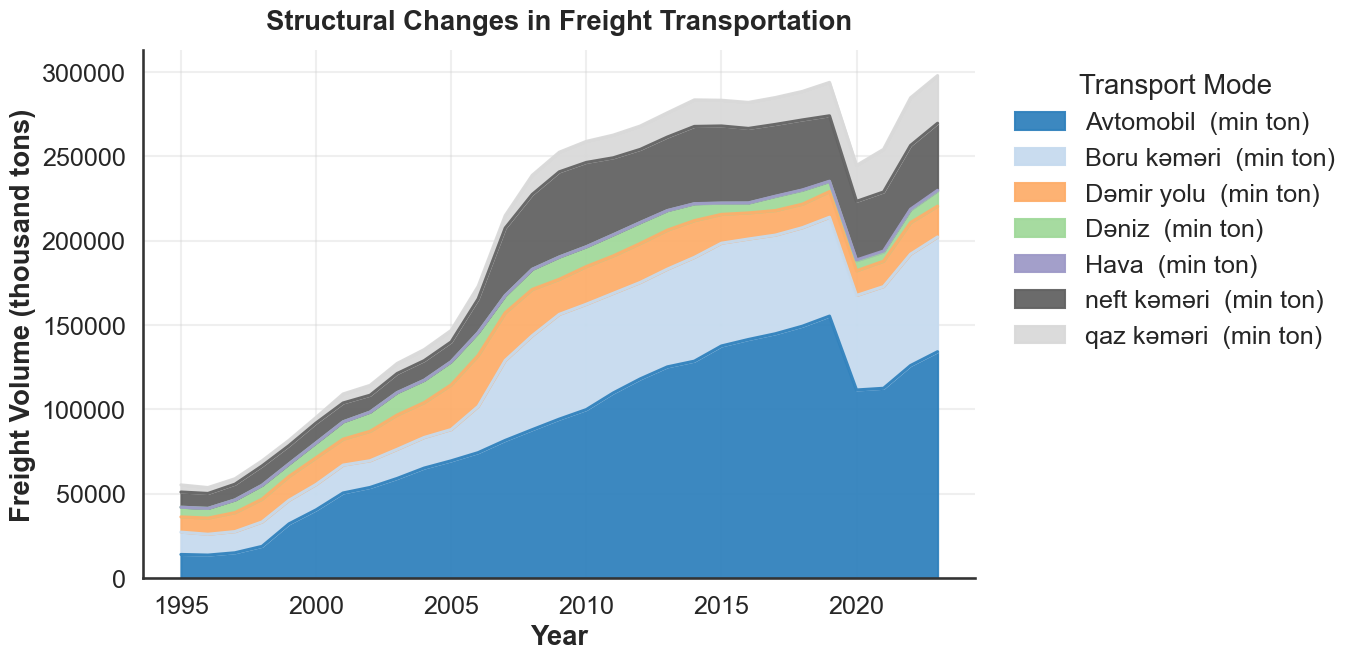

In [6]:
structure = df_long[~df_long["Göstərici"].str.contains("Cəmi")]

pivot = structure.pivot(
    index="Year",
    columns="Göstərici",
    values="Freight (thousand tons)"
)

fig, ax = plt.subplots()

pivot.plot.area(
    ax=ax,
    colormap="tab20c",
    alpha=0.95
)

ax.set_title("Structural Changes in Freight Transportation", pad=15)
ax.set_xlabel("Year")
ax.set_ylabel("Freight Volume (thousand tons)")

ax.legend(
    title="Transport Mode",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False
)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

#### **Graph Analysis: Composition & Trends**
* **Volume Expansion**: The expanding vertical height of the chart confirms the significant growth in Azerbaijan's total freight capacity over time.
* **Dominant Segments**: The largest "bands" in the area chart represent the primary modes of transport. Changes in the thickness of these bands indicate shifts in economic reliance—for example, a widening band for Road transport suggests increased domestic trade and infrastructure development.
* **Stability of the Mix**: By observing the boundaries between colors, we can see if any specific mode has been completely replaced or if they have all grown proportionally.
* **Visual Clarity**: The use of a stacked area format makes it easy to visualize the "sum of parts," providing a more holistic view than individual lines.

### Step 7: Interactive Trend Analysis (Plotly)
While static charts are excellent for reports, interactive visualizations allow for a deeper, self-guided exploration of the data. In this step, we use **Plotly** to create a multi-line chart. This allows us to:
* **Isolate Modes**: Click on items in the legend to toggle specific transport modes (e.g., viewing only *Air* or *Rail*).
* **Unified Hover**: Move the cursor over the chart to see a synchronized tooltip showing values for all modes in a specific year.
* **Granular Detail**: Zoom in on specific time periods or smaller volume sectors that might be overshadowed by the larger "Road" or "Pipeline" sectors in static views.

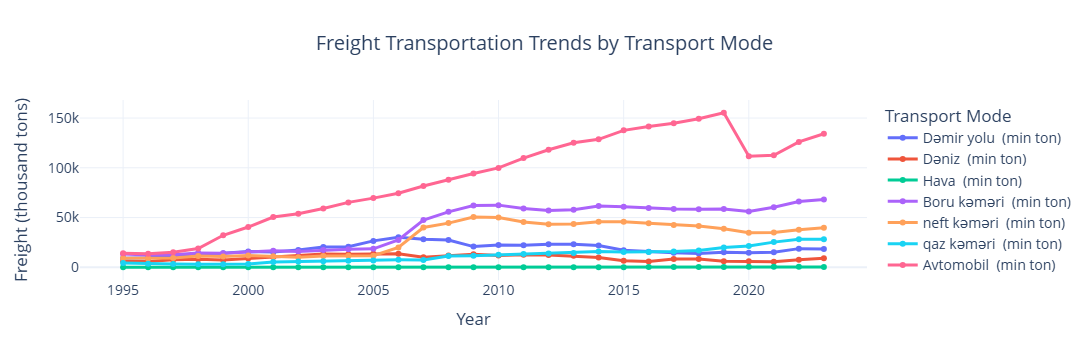

In [7]:
fig = px.line(
    structure,
    x="Year",
    y="Freight (thousand tons)",
    color="Göstərici",
    markers=True,
    title="Freight Transportation Trends by Transport Mode",
    template="plotly_white"
)

fig.update_layout(
    title_x=0.5,
    legend_title_text="Transport Mode",
    hovermode="x unified",
    font=dict(size=14)
)

fig.update_traces(line=dict(width=3))

fig.show()

#### **Graph Analysis: Sector-Specific Momentum**
* **Dynamic Comparison**: By using the interactive legend, we can clearly see that while **Road Transport (Avtomobil)** shows aggressive growth, other modes like **Rail (Dəmir yolu)** and **Sea (Dəniz)** exhibit more cyclical patterns related to regional trade agreements and transit corridor activity.
* **Data Precision**: The "x unified" hover mode provides immediate access to the exact tonnage (thousand tons) for every sector simultaneously, making it easier to identify years where one sector grew while another declined.
* **Trend Consistency**: The markers on each data point help identify years with missing data or significant shifts, such as the economic fluctuations seen in the late 2000s and around 2020.

### Step 8: Visualizing Freight Intensity
In this step, we use a **Heatmap** to observe the intensity of freight transportation across all modes and years simultaneously. Since some transport modes (like Road) have volumes thousands of times larger than others (like Air), a raw comparison would hide the trends of the smaller sectors.

To solve this, we apply **Min-Max Normalization**:
* We scale each transport mode's data relative to its own historical peak (0 to 1).
* **0 (Lighter/Darker depending on cmap)**: Represents the year with the lowest volume for that specific mode.
* **1 (Brightest)**: Represents the year when that specific mode reached its historical maximum.

This allows us to see the "momentum" of every sector on a level playing field.

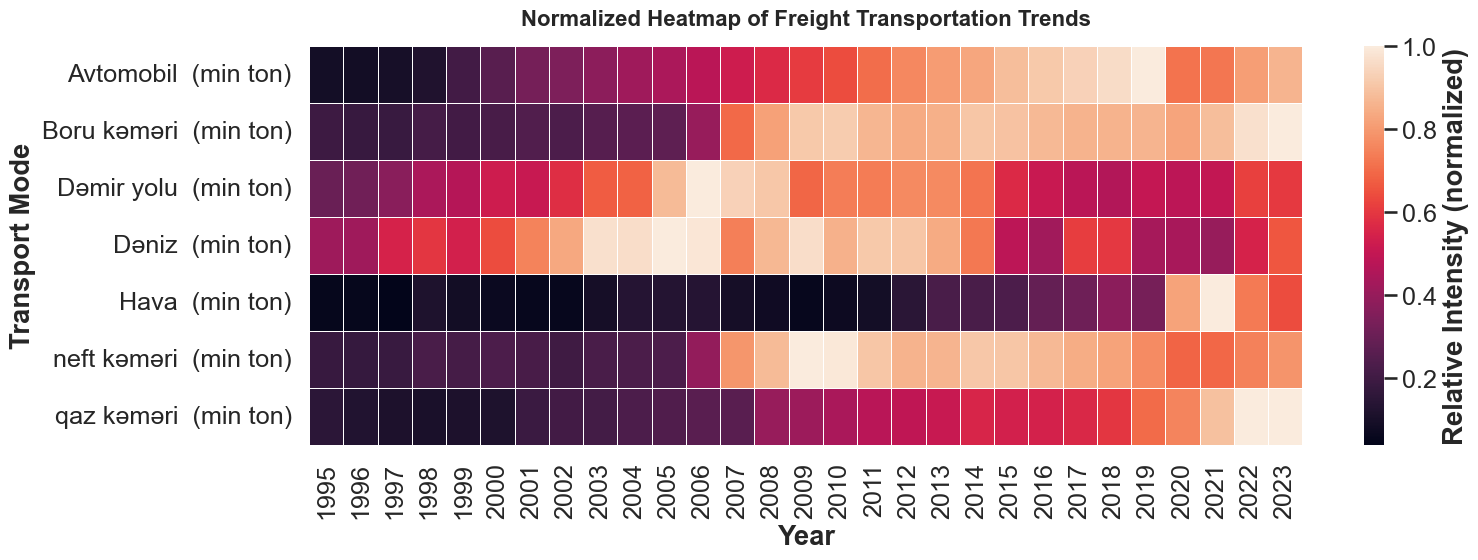

In [8]:
heatmap_data = df_long[
    ~df_long["Göstərici"].str.contains("Cəmi")
]

heatmap_pivot = heatmap_data.pivot(
    index="Göstərici",
    columns="Year",
    values="Freight (thousand tons)"
)

normalized = heatmap_pivot.div(heatmap_pivot.max(axis=1), axis=0)

plt.figure(figsize=(16, 6))

sns.heatmap(
    normalized,
    cmap="rocket",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={
        "label": "Relative Intensity (normalized)"
    }
)

plt.title(
    "Normalized Heatmap of Freight Transportation Trends",
    fontsize=16,
    weight="bold",
    pad=15
)

plt.xlabel("Year")
plt.ylabel("Transport Mode")

plt.tight_layout()
plt.show()

#### **Graph Analysis: Growth Cycles and Peaks**
* **Relative Growth**: The heatmap reveals when each sector reached its "prime." If the right side of the map (recent years) is brighter, it indicates that the sector is currently at its historical peak.
* **Sectoral Synchronization**: We can observe if all transport modes grew together (indicated by vertical bands of color change) or if specific sectors had unique boom periods independent of the others.
* **Road & Pipeline Resilience**: By looking at the rows for *Hava* and *Qaz kəməri*, we can track how consistently these high-volume sectors have maintained their intensity over the last three decades.
* **Niche Trends**: Even though Air transport (*Hava*) has lower absolute volume, the normalized heatmap allows us to see its specific growth spikes which would be invisible on a standard bar chart.

### Step 9: Identifying the Historical Peak
In this final analysis step, we return to the **Total Freight Transportation** data to pinpoint exactly when the sector reached its highest volume in history. 

Identifying the **Peak Year** is a critical economic metric because:
* It marks the high point of logistics throughput.
* It provides a benchmark to assess recovery or growth patterns following major global events (such as the 2008 financial crisis or the 2020 pandemic).
* It helps policymakers understand the maximum capacity the current infrastructure has historically supported.

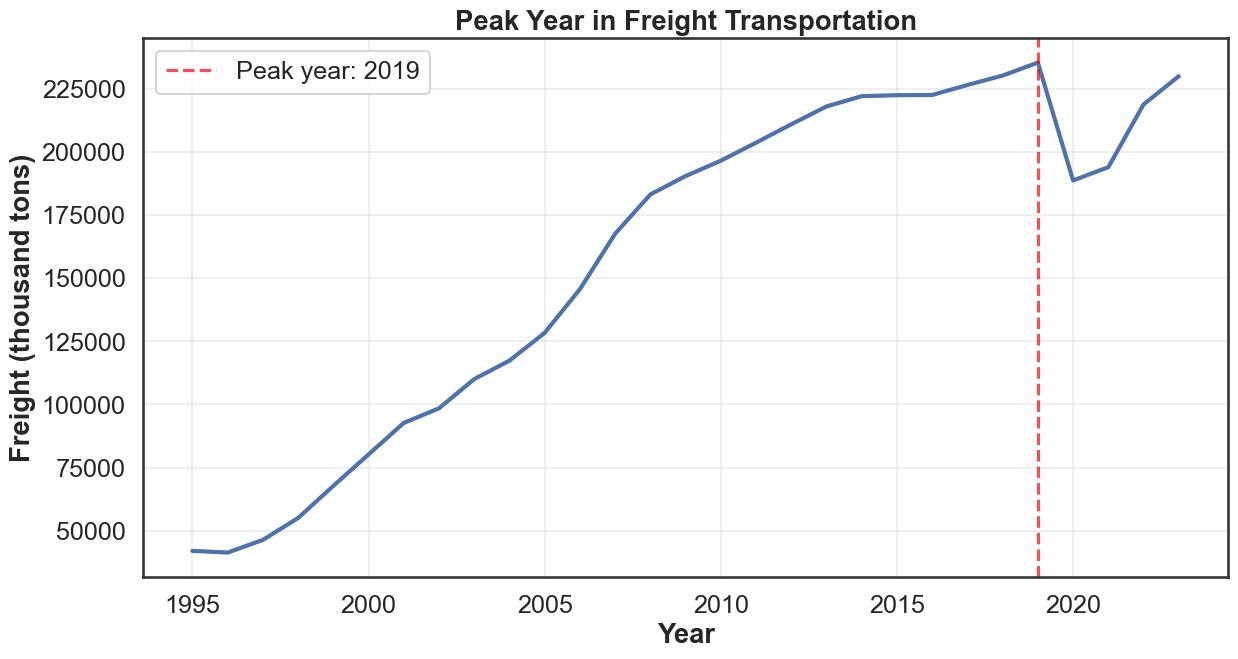

In [9]:
peak_year = total.loc[
    total["Freight (thousand tons)"].idxmax(),
    "Year"
]

plt.figure()
sns.lineplot(
    data=total,
    x="Year",
    y="Freight (thousand tons)",
    linewidth=3
)

plt.axvline(
    x=peak_year,
    linestyle="--",
    color="red",
    alpha=0.7,
    label=f"Peak year: {peak_year}"
)

plt.legend()
plt.title("Peak Year in Freight Transportation")
plt.show()

## Conclusion and Key Findings

Based on the multi-dimensional analysis of freight transportation in Azerbaijan from 1995 to the present, we can conclude the following:

1. **🚀 Sustained Growth**: There is a clear, long-term upward trajectory in total freight volumes, signifying the increasing importance of Azerbaijan as a regional logistics hub.
2. **🚛 Modal Specialization**:
    * **Road (Avtomobil)**: Remains the dominant and fastest-growing sector for domestic and regional delivery.
    * **Pipeline (Boru kəməri)**: Represents the steady backbone of the energy-related transport sector.
    * **Rail & Sea**: These sectors show more volatility, reflecting their sensitivity to international trade agreements and transit corridor shifts.
3. **📊 Shift in Intensity**: The heatmap confirms that while historical volumes were concentrated in specific sectors, the modern era shows a more diverse and high-intensity distribution across multiple transport modes.
4. **💡 Strategic Outlook**: The data suggests that infrastructure investments in road and pipeline networks have directly translated into volume growth, while there remains significant room for expansion in specialized high-value sectors like Air transport.